In [75]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Analyze Model

### Import libraries

In [3]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Machine Learning
from xgboost import XGBClassifier
from xgboost import plot_tree

# Utils
from bimbo.xgboost_models import *

In [4]:
# load model from file

loaded_model = load_model("model_2")

[12:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Loaded model from: pima.pickle.dat


### Plot a Single XGBoost Decision Tree

**brew install graphviz**
`pip install graphviz`

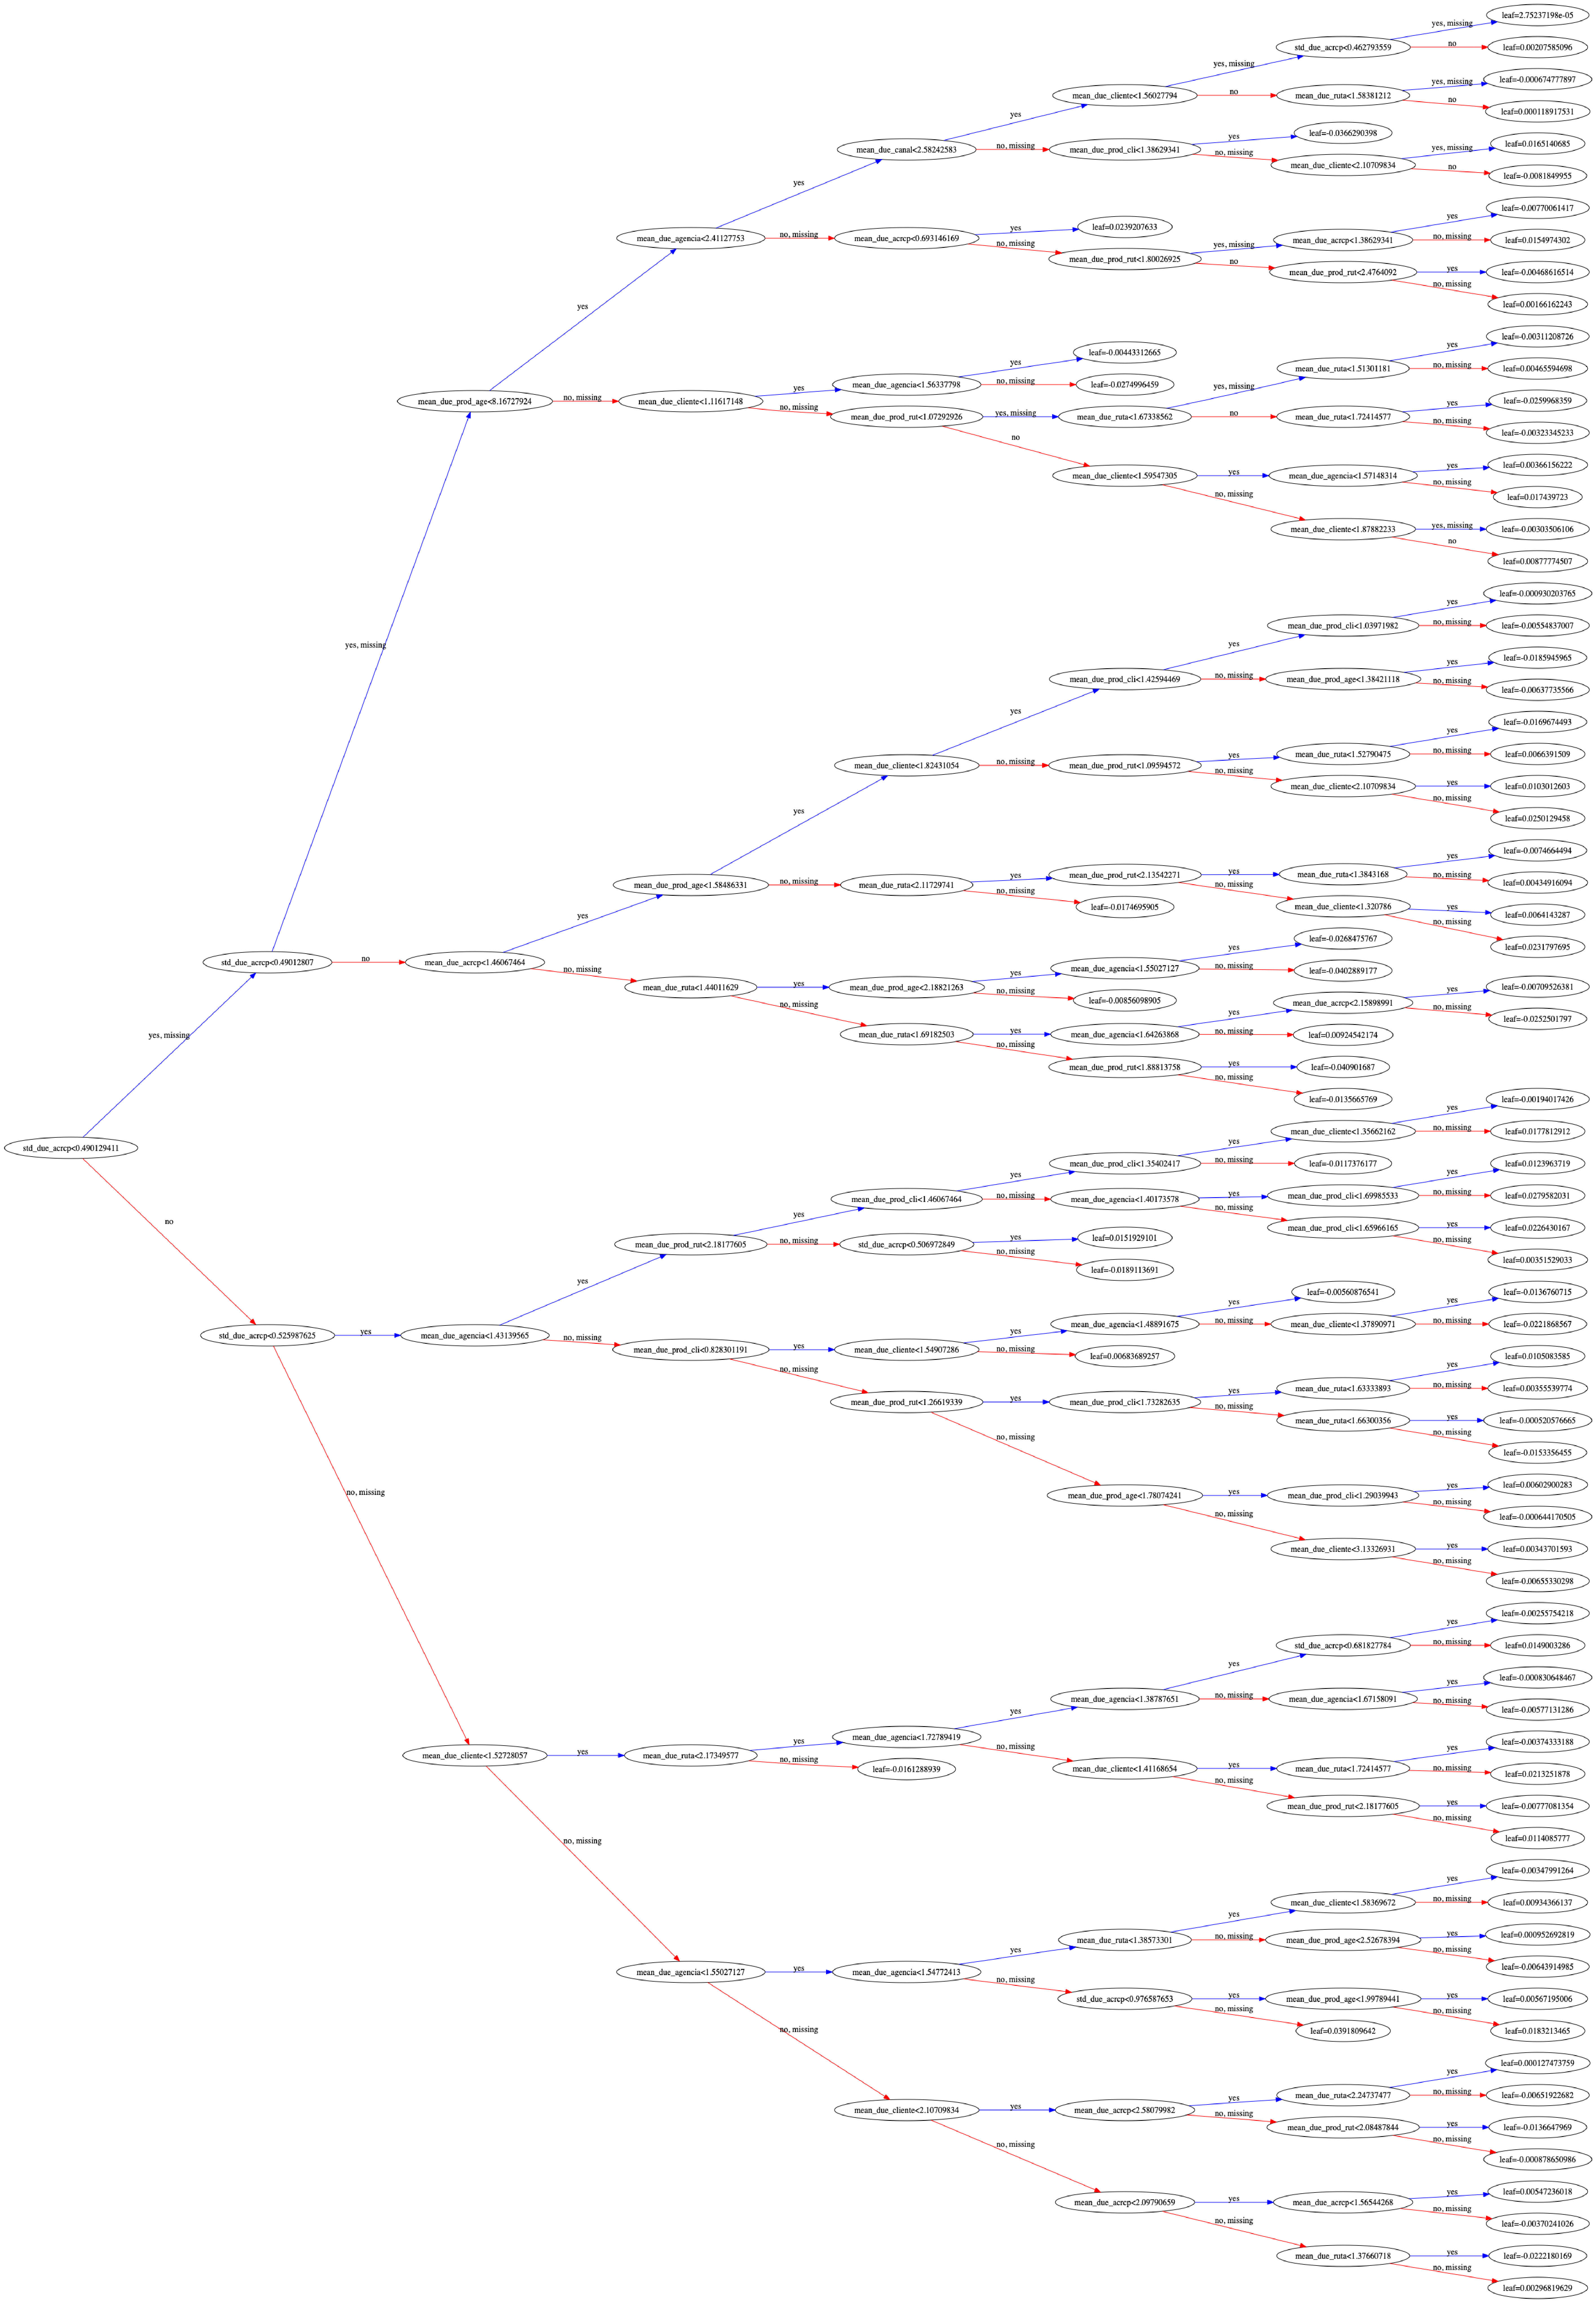

In [5]:
# plot the nth boosted tree in the sequence as follows:

n=5

plot_tree(loaded_model,
          num_trees=130,
          rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 150)
fig.savefig('../images/boosted_tree_1.png', dpi=100)
plt.show()

### Manually Plot Feature Importance

In [6]:
# print feature importance
print(loaded_model.feature_importances_)

[0.00185333 0.00595182 0.00187301 0.01500836 0.02316635 0.05223607
 0.36967632 0.00514387 0.06949937 0.0018769  0.00525175 0.4484628 ]


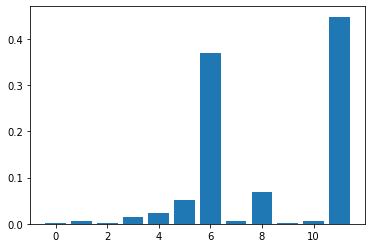

In [7]:
plt.bar(range(len(loaded_model.feature_importances_)), loaded_model.feature_importances_)
plt.show()

### Using the Built-in XGBoost Feature Importance Plot

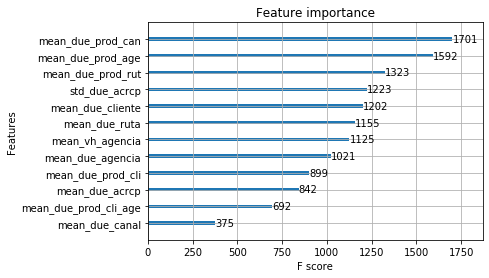

In [8]:
from xgboost import plot_importance

# plot feature importance
plot_importance(loaded_model)
plt.show()

### Feature Selection with XGBoost Feature Importance Scores

In [9]:
# Import data
processed_val_df = pd.read_csv('../data/processed_val.csv')

In [10]:
X = processed_val_df.drop('log_demanda_uni_equil', axis=1)
y = processed_val_df['log_demanda_uni_equil']

In [37]:
processed_val_df.head(3)

,Demanda_uni_equil,log_demanda_uni_equil,mean_due_agencia,mean_due_canal,mean_due_ruta,mean_due_cliente,mean_due_prod_age,mean_due_prod_rut,mean_due_prod_cli,mean_due_prod_can,mean_due_prod_cli_age,mean_vh_agencia,std_due_acrcp,mean_due_acrcp
0,1,0.693147,2.010012,1.996967,2.08378,1.719464,1.587694,1.556331,1.599232,1.512998,1.599232,4.113977,0.165949,1.599232
1,2,1.098612,2.010012,1.996967,2.08378,1.719464,1.680625,1.553152,1.212066,1.601887,1.212066,4.113977,0.320511,1.212066
2,2,1.098612,2.010012,1.996967,2.08378,1.719464,1.931563,1.803948,1.746179,1.819226,1.746179,4.113977,0.500848,1.746179


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
        test_size=0.5, random_state=42)

X_train.drop(['Demanda_uni_equil'], axis=1, inplace=True)
X_val.drop(['Demanda_uni_equil'], axis=1, inplace=True)

/Users/herve/.pyenv/versions/3.7.6/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [45]:
# make predictions for test data and evaluate
predictions = loaded_model.predict(X_val)

In [48]:
final_predictions = np.expm1(predictions).round().astype(int)
final_y_val = np.expm1(y_val).round().astype(int)

In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(final_y_val, final_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 26.38%


In [74]:
accuracy = accuracy_score(final_y_val, np.full(len(final_predictions), 2))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 20.12%


Giving a prediction filled with 2 gives an accuracy of **20.12%**, vs now an accuracy of **26.38%**.

### Evaluate XGBoost Models With Learning Curves

In [76]:
results = loaded_model.evals_result()
print(results)

{'validation_0': {'rmse': [1.021334, 0.790236, 0.645836, 0.561392, 0.513013, 0.488116, 0.474054, 0.466546, 0.46256, 0.460333, 0.459101, 0.458173, 0.457636, 0.457249, 0.456871, 0.456544, 0.456254, 0.456095, 0.455908, 0.455755, 0.455617, 0.455428, 0.455315, 0.455159, 0.454994, 0.454874, 0.454714, 0.454594, 0.454477, 0.454408, 0.454273, 0.454164, 0.454077, 0.453977, 0.453837, 0.453758, 0.453688, 0.4536, 0.453544, 0.453445, 0.453338, 0.453299, 0.453239, 0.453155, 0.453071, 0.453008, 0.452828, 0.452795, 0.452735, 0.452709, 0.452665, 0.452606, 0.45257, 0.452488, 0.452412, 0.452383, 0.45233, 0.452257, 0.452176, 0.452137, 0.452106, 0.452059, 0.451963, 0.451905, 0.451877, 0.451811, 0.451771, 0.451736, 0.451713, 0.451681, 0.451658, 0.451606, 0.451543, 0.451502, 0.45147, 0.451406, 0.451344, 0.451307, 0.451276, 0.451221, 0.451188, 0.451157, 0.451135, 0.451089, 0.451049, 0.450995, 0.450971, 0.450922, 0.450892, 0.450863, 0.450834, 0.450801, 0.450761, 0.450725, 0.450669, 0.450631, 0.450576, 0.450542,

In [80]:
# evaluate predictions
accuracy = accuracy_score(final_y_val, final_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) 

Accuracy: 26.38%


In [86]:
# retrieve performance metrics
results = loaded_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
x_axis

range(0, 149)

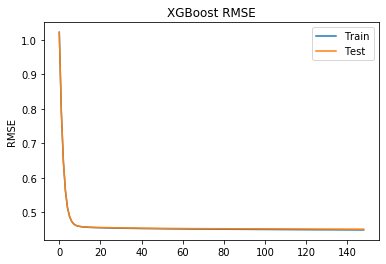

In [89]:
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train') 
ax.plot(x_axis, results['validation_1']['rmse'], label='Test') 
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

In [92]:
# # plot classification error
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_0']['rmse'], label='Train') 
# ax.plot(x_axis, results['validation_1']['rmse'], label='Test') 
# ax.legend()
# plt.ylabel('Classification Error') 
# plt.title('XGBoost Classification Error')
# plt.show()